In [6]:
from sklearn.learning_curve import learning_curve

In [7]:
from classification import dao

In [8]:
import pickle
import numpy as np

In [4]:
clf_alc = pickle.load(open('pickles/clf_alc_UPDATED.p', 'rb'))

In [5]:
clf_fpa = pickle.load(open('pickles/clf_fpa_UPDATED.p', 'rb'))

In [14]:
clf_fpl = pickle.load(open('pickles/clf_fpl_UPDATED.p', 'rb'))

In [18]:
%%time

from data import DataAccess, LabelGetter

Labeled = DataAccess.get_as_dataframe()
L = LabelGetter(Labeled)

Wall time: 4.37 s


# FPL Logreg

In [21]:
verified = pickle.load(open('amt/double_labeled_test.p', 'rb'))
L = LabelGetter(verified)

In [22]:
X, y = L.get_first_person_label()

In [23]:
y.shape

(525,)

In [24]:
%%time
train_sizes, train_scores, valid_scores = learning_curve(clf_fpl, X, y, scoring='f1_weighted', train_sizes=np.arange(0.1, 1, 0.1), cv=5)

C:\Users\Tom Work\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom Work\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom Work\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom Work\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Wall time: 7.2 s


C:\Users\Tom Work\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
valid_scores

array([[ 0.42948351,  0.57972623,  0.47974822,  0.60580715,  0.62938189],
       [ 0.51864725,  0.58391762,  0.52023639,  0.62888421,  0.66856061],
       [ 0.60705205,  0.58640507,  0.5561205 ,  0.69123251,  0.67552737],
       [ 0.59483755,  0.65015343,  0.66949253,  0.69179882,  0.70543771],
       [ 0.66470558,  0.6410668 ,  0.67835189,  0.70989063,  0.69193964],
       [ 0.62201818,  0.63139185,  0.66704377,  0.71665688,  0.70182532],
       [ 0.6671807 ,  0.67241289,  0.67111706,  0.74186931,  0.65472788],
       [ 0.62881444,  0.66451684,  0.66715142,  0.74311222,  0.65430908],
       [ 0.64557339,  0.68903984,  0.67830688,  0.74373959,  0.66755019]])

In [26]:
train_scores

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [27]:
train_sizes

array([ 41,  83, 125, 167, 209, 251, 293, 335, 377])

In [29]:
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

In [36]:
# F1 score, 5-fold CV
def plot_learning_curve(clf, X, y, train_pieces):
    '''
    train_pieces: number of pts to plot
    '''
    train_size = 1/train_pieces
    train_sizes, train_scores, test_scores = learning_curve(clf_fpl, X, y, scoring='f1_weighted',
                                                            train_sizes=np.arange(train_size, 1, train_size), cv=5)
    plt.figure()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

    plt.legend(loc="best")

    plt.show()
    

C:\Users\Tom Work\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom Work\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom Work\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom Work\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom Work\Anaconda3\lib\site-packages\sk

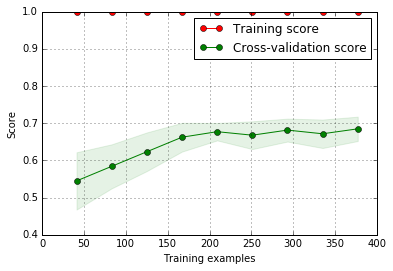

In [33]:
plot_learning_curve(clf_fpl, X, y)